# Résolution de l'équation de transport

Soit $c > 0$ fixé, soient $L > 0$ et $T > 0$. On considère le problème aux limites suivant, d'inconnue $u$ telle que :
$$\begin{equation}
    \begin{cases}
        u_t + cu_x = 0 &&\forall x \in ]0,L[, &&\forall t \in ]0, T[\,, \\
        u(x = 0, t) = e^{−t} &&\forall t \in ]0, T[\,, \\
        u(x, t = 0) = 0 &&\forall x \in ]0,L[\,.
    \end{cases}
\end{equation}$$
Cette équation représente le transport d'une quantité scalaire $u$ à la vitesse $c$. On a imposé une condition aux limites à gauche de Dirichlet inhomogène. De plus, on a supposé que la condition initiale était identiquement nulle.

Dans les applications, on pourra prendre $c = 1$, $L = 1$ et $T = 0.5$.

## 1. Méthode des courbes caractéristiques

La courbe $\Sigma$ est caractéristique si et seulement si la solution est constante sur cette courbe.  
Supposons que la courbe est paramétrée par le temps

$$
    t \rightarrow \begin{pmatrix} x(t) \\ t \end{pmatrix} \in \Sigma
$$

Si $u$ est solution de $\delta_t u + c\delta_x u = 0$, alors $u(x(t), t)$ est constante.

$$
    \frac{\mathrm{d}}{\mathrm{d}t} u(x(t), t) = 0 \Longrightarrow \frac{\mathrm{d}u}{\mathrm{d}x}(x(t), t) x'(t) + \frac{\mathrm{d}u}{\mathrm{d}t}(x(t), t) = 0.
$$

Ce qui est vrai si $x'(t) = c$.

Si $\delta_t u + c\delta_x u = 0$, alors, pour toute fonction $f$ régulière,

$$
    \boxed{\delta_t f(u) + x\delta_x f(u) = 0}
$$

Il y a unicité de la solution, car l’équation est linéaire.

Si $x > ct$, $u(x, t) = u(x − ct, 0) = 0$.  
Sinon, $(x, t)$ et $(0, t_1)$ sont sur la même courbe caractéristique :

$$
    u(x, t) = u(0, t_1) = e^{−t_1} \begin{cases} x = ct + x_0 \\ 0 = ct_1 + x_0 \end{cases} \\
    x = c(t − t_1) \quad ; \quad t_1 = −\frac{x}{c}
$$

Si $x \leqslant ct$, $u(x, t) = \exp\left(−t + \frac{x}{c}\right)$.

Donc,

$$
    u(x, t) = \begin{cases} 0 && \text{si } x > ct, \\ \exp\left(−t + \frac{x}{c}\right) && \text{sinon.} \end{cases}
$$


## 2. Schéma explicite décentré amont _(upwind)_

On écrit le schéma aux différences finies décentrées permettant d’approcher les solutions du problème (1).  
Avec $N$ points de discrétisation, la solution approchée sera notée $u^n_i \simeq u(i\Delta x, n\Delta t)$, où $\Delta x = L/N$ et $\Delta t > 0$.

On pose

- $x_i = i \Delta x, i \in \mathbb{Z}$
- $t_n = n \Delta t$
- $u^n_i \simeq u(x_i, t_n)$

$$
    \begin{align*}
        \frac{u(x, t + \Delta t) - u(x, t)}{\Delta t} &= \delta_t u(x, t) + O(\Delta t) \\
        \Rightarrow \frac{u(x_i, t_{n+1}) - u(x_i, t_n)}{\Delta t} &= \delta_t u(x_i, t_n) + O(\Delta t) \\
        \Longrightarrow \delta_t u^n_i &\simeq \frac{u^{n+1}_i - u^n_i}{\Delta t}
    \end{align*}
$$

$$
    \begin{align*}
        \frac{u(x, t) - u(x - \Delta x, t)}{\Delta x} &= \delta_x u(x, t) + O(\Delta x) \\
        \Rightarrow \frac{u(x_i, t_n) - u(x_{i-1}, t_n)}{\Delta t} &= \delta_x u(x_i, t_n) + O(\Delta x) \\
        \Longrightarrow \delta_x u^n_i &\simeq \frac{u^n_i - u^{n-1}_i}{\Delta x}
    \end{align*}
$$

On en déduit

$$
    \begin{align*}
        \frac{u^{n+1}_i - u^n_i}{\Delta t} + c \, \frac{u^n_i - u^n_{i-1}}{\Delta x} &= 0 \\
        \Rightarrow u^{n+1}_i - u^n_i + \frac{c \Delta t}{\Delta x}(u^n_i - u^n_{i-1}) &= 0 \\
        \Longrightarrow u^{n+1}_i &= u^n_i - \frac{c \Delta t}{\Delta x}(u^n_i - u^n_{i-1})
    \end{align*}
$$

En posant $A = \begin{pmatrix} 1 &0 &\cdots &0 \\ -1 &1 &\ddots &0 \\ \vdots &\ddots &\ddots &\vdots \\ 0 &\cdots &-1 &1 \end{pmatrix}$, on a

$$
    U^n - \frac{c \Delta t}{\Delta x} AU^n =
        \begin{pmatrix}
            u^n_1 - \frac{c \Delta t}{\Delta x} u^n_1 \\
            u^n_2 - \frac{c \Delta t}{\Delta x}\left(u^n_2 - u^n_1\right) \\
            \vdots \\
            u^n_N - \frac{c \Delta t}{\Delta x}\left(u^n_N - u^n_{N-1}\right)
        \end{pmatrix} = U^{n+1} -
        \begin{pmatrix}
            \frac{c \Delta t}{\Delta x} u^n_0 \\
            0 \\
            \vdots \\
            0
        \end{pmatrix}
$$

Or $u^n_0 = u(0, n\Delta t) = \exp(-n\Delta t)$. Ainsi, en posant $G_n = \begin{pmatrix}\frac{c \Delta t}{\Delta x} \mathrm{e}^{-n\Delta t} \\ 0 \\ \vdots \\ 0\end{pmatrix}$, on a

$$
    \boxed{U^{n+1} = U^n - \frac{c \Delta t}{\Delta x} AU^n + G^n}
$$


## 3. Étude de la stabilité

Pour étudier la stabilité, on remplace la condition à la limite gauche par $u(0, t) = 0$ et la condition initiale par $u(x, 0) = u_0(x)$, pour $u_0 \in L^2$ ou $u_0 \in L^{\infty}$.

### - _Stabilité_ $L^2$

On utilise l'**analyse de Fourier** :

On note $\beta = \frac{c\Delta t}{\Delta x}$.  
Pour $k \in \mathbb{Z}$, le coefficient de Fourier $\hat{u}^n(k)$ de la solution du schéma vérifie

$$
    \hat{u}^{n+1}(k) = \left[1 - \beta + \beta\mathrm{e}^{-i2\pi k\Delta x}\right] \hat{u}^n(k).
$$

En notant $\xi = 2\pi k\Delta x$,

$$
    \begin{align*}
        \hat{u}^{n+1}(k) &= \left[1 - \beta + \beta\mathrm{e}^{-\xi}\right] \hat{u}^n(k) \\
                         &= \left[1 - \beta + \beta\left(\cos(-\xi) + i\sin(-\xi)\right)\right] \hat{u}^n(k) \\
                         &= \left[1 - \beta + \beta\cos(\xi) - i\beta\sin(\xi)\right] \hat{u}^n(k)
    \end{align*}
$$

Après simplification, on obtient

$$
    \left|\hat{u}^{n+1}(k)\right|^2 = \left|\mathrm{A}(k)\right|^2 \left|\hat{u}^n(k)\right|^2
$$

avec

$$
    \begin{align*}
        \left|\mathrm{A}(k)\right|^2 &= \left[1 - \beta + \beta\cos(\xi)\right]^2 + \beta^2\sin^2(\xi) \\
                            &= 1 + 2\beta(\beta - 1)(1 - \cos(\xi))
    \end{align*}
$$

On a

$$
    \begin{align*}
        \left|\mathrm{A}(k)\right| &\leqslant 1 && \forall k \in \mathbb{Z} \\
        \Leftrightarrow \beta(\beta - 1)(1 - \cos(\xi)) &\leqslant 0 && \forall \xi \in \mathbb{R} \\
        \Leftrightarrow \beta(\beta - 1) &\leqslant 0
    \end{align*}
$$

Pour $0 \leqslant \beta \leqslant 1$, on a $\left|\mathrm{A}(k)\right| \leqslant 1$ pour toute fréquence $k \in \mathbb{Z}$, ce qui prouve que le schéma est stable en norme $L^2$ sous la condition CFL $\boxed{0 \leqslant \beta \leqslant 1}$.  
On en déduit que $\boxed{\Delta t \leqslant \frac{\Delta x}{c}}$

### - _Stabilité_ $L^\infty$

On peut réécrire le schéma sous la forme

$$
    u^{n+1}_j = \frac{c\Delta t}{\Delta x} u^n_{j-1} + \left(1 - \frac{c\Delta t}{\Delta x}\right) u^n_j
$$

qui est une combinaison convexe si $0 \leqslant c\Delta t \leqslant \Delta x$, donc il vérifie un **principe du maximum discret**.  
L'erreur de troncature est

$$
    E = \frac{|c|}{2}(-\Delta x + |c|\Delta t)\frac{\delta^2 u}{\delta x^2} + O\left((\Delta x)^2 + (\Delta t)^2\right)
$$

Le schéma décentré amont est stable $L^\infty$ sous la condition CFL $\boxed{|c|\Delta t \leqslant \Delta x}$.  
Il est précis d’ordre 1 seulement (sauf si $|c|\Delta t = \Delta x$). Il est donc convergent.


## 4. Programmation du schéma

En posant $\beta = \frac{c\Delta t}{\Delta x}$ , le schéma devient
$$ U^{n+1} = U^n − \beta AU^n + G^n $$
puis, en posant $G_n = \begin{pmatrix} e^{−n\Delta t} \\ 0 \\\vdots \\ 0 \end{pmatrix}$, $G^n = \beta G_n$, et donc
$$ U^{n+1} = U^n − \beta AU^n + \beta G_n = \boxed{U^n + \beta\left(G_n − AU^n\right)}$$

In [1]:
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def left_boundary_condition(t):
    """
    Calcule et retourne la valeur de la condition aux limites à gauche en fonction de t.
    """
    return np.exp(-t)

def exact_solution(x, t, c):
    """
    Calcule et retourne la solution exacte en fonction de x, t et c.
    """
    return np.where(x <= c * t, np.exp(-t + x / c), 0)

def compute_G(nx, t):
    """
    Calcule et retourne le vecteur G en fonction de nx et du temps.
    """
    G = np.zeros(nx)
    G[0] = left_boundary_condition(t)
    return G

def compute_A_upwind(nx):
    """
    Calcule et retourne la matrice A pour le schéma décentré amont en fonction de nx.
    """
    diag = np.ones(nx)
    low = -np.ones(nx - 1)
    return diags([low, diag], [-1, 0])

def update(u, A, G, beta):
    """
    Calcule et retourne la mise à jour en temps du vecteur u en utilisant les schémas décentré et centré.
    """
    return u + beta * (G - A @ u)

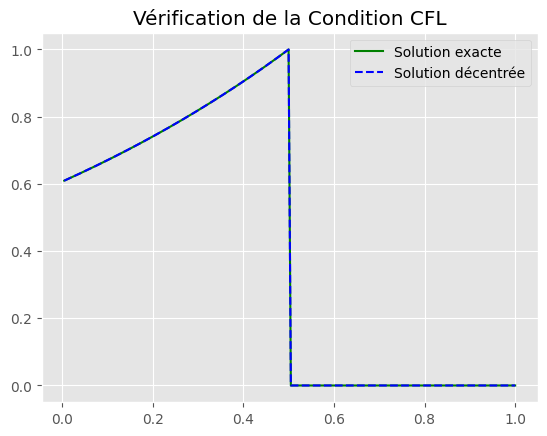

In [3]:
# Paramètres du domaine et discrétisation
L = 1  # Taille du domaine
nx = 200  # Nombre de points
dx = L / nx  # Pas d'espace
x = np.linspace(0, L, nx + 1)[1:]  # Points de discrétisation

# Paramètres de l'équation de transport
c = 1  # Vitesse
t = 0  # Temps initial
t_end = 0.5  # Temps final

# Calcul des paramètres de discrétisation temporelle
CFL = 1
dt = CFL * dx / c
beta = c * dt / dx

# Conditions initiales et préparation du schéma décentré amont
u_upwind = np.zeros(nx)  # Condition initiale
A = compute_A_upwind(nx)  # Matrice pour le schéma décentré amont

# Boucle en temps : mise à jour de la solution
while t < t_end:
    G = compute_G(nx, t)
    u_upwind = update(u_upwind, A, G, beta)
    t += dt

# Affichage des résultats
plt.plot(x, exact_solution(x, t_end, c), "g", label="Solution exacte")
plt.plot(x, u_upwind, "b--", label="Solution décentrée")
plt.title('Vérification de la Condition CFL')
plt.legend()
plt.show()

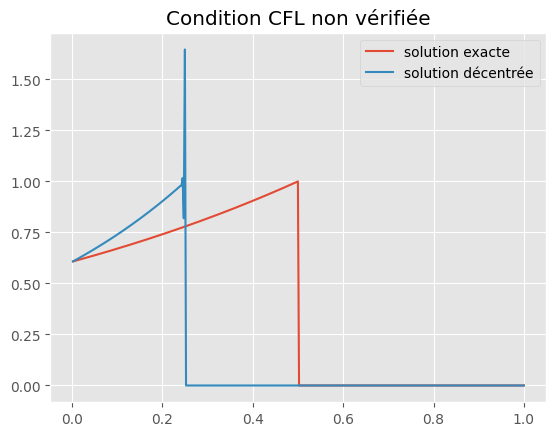

In [4]:
dt_u = dt

CFL = 1 + dx  # coefficient CFL (coefficient que multiplie dt)
dt = CFL * dx / c  # pas de temps
beta = c * dt / dx  # valeur du paramètre β
x = np.linspace(0, L, 2*nx + 1)[1:]

u = np.zeros(2*nx)  # condition initiale
A = compute_A_upwind(2*nx)  # matrice pour le schéma décentré amont

t = 0
while t < t_end:
    # boucle en temps : on fait évoluer la valeur de u en utilisant
    u = update(u, A, compute_G(2*nx, t), beta)
    t += dt

# affichage des résultats
plt.plot(x, exact_solution(x, t_end, c), label="solution exacte")
plt.plot(x, u, label="solution décentrée")
plt.title('Condition CFL non vérifiée')
plt.legend()
plt.show()

On voit bien que la solution décentrée n’est plus stable lorsque la condition CFL n’est pas vérifiée.

## 5. Vérification numérique de la convergence du schéma

On tracera en échelle logarithmique l'erreur (en normes $L^1$ et $L^2$) entre la solution exacte et la solution approchée, et ce pour diverses finesses du maillage.

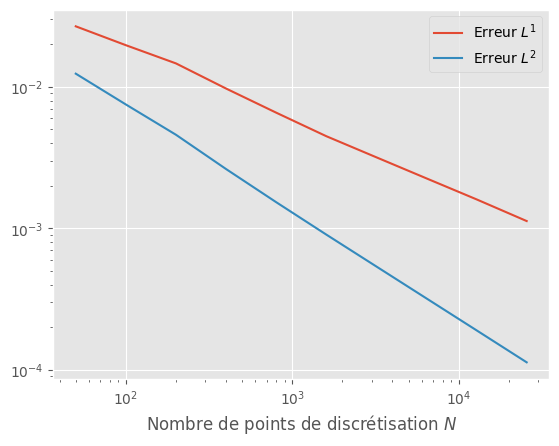

Schéma d'ordre 0.52 en erreur L1
Schéma d'ordre 0.76 en erreur L2


In [5]:
# Toutes les finesses de maillage à tester
all_nx = 50 * 2**np.arange(10)

# Vecteurs pour stocker les erreurs L1 et L2
errors_L1 = np.zeros(len(all_nx))
errors_L2 = np.zeros(len(all_nx))

# Paramètres du problème
L = 1
c = 1
t_end = 0.5

for i_nx, nx in enumerate(all_nx):
    dx = L / nx
    x = np.linspace(0, L, nx + 1)[1:]

    t = 0
    CFL = 0.9
    dt = CFL * dx / c
    beta = c * dt / dx

    u = np.zeros(nx)
    A = compute_A_upwind(nx)

    while t < t_end:
        u = update(u, A, compute_G(nx, t), beta)
        t += dt

    u_e = exact_solution(x, t_end, c)
    errors_L1[i_nx] = np.linalg.norm(u - u_e, 1) * dx
    errors_L2[i_nx] = np.linalg.norm(u - u_e) * dx

# Affichage des résultats : graphes et ordre de convergence
plt.loglog(all_nx, errors_L1, label="Erreur $L^1$")
plt.loglog(all_nx, errors_L2, label="Erreur $L^2$")
plt.xlabel('Nombre de points de discrétisation $N$')
plt.legend()
plt.show()

# Calcul et affichage de l'ordre de convergence
order_L1 = -np.polyfit(np.log(all_nx), np.log(errors_L1), 1)[0]
order_L2 = -np.polyfit(np.log(all_nx), np.log(errors_L2), 1)[0]

print("Schéma d'ordre {0:4.2f} en erreur L1".format(order_L1))
print("Schéma d'ordre {0:4.2f} en erreur L2".format(order_L2))

## 6. Schéma aux différences finies centré

Avec $N$ points de discrétisation, nous noterons la solution approchée $u^n_i \simeq u(i\Delta x, n\Delta t)$, où $\Delta x = \frac{L}{N}$.

En utilisant l’approximation $\displaystyle \delta_x u^n_i \simeq \frac{u^n_{i+1} - u^n_{i-1}}{2\Delta x}$, on déduit
$$
    \boxed{\frac{u^{n+1}_i - u^n_i}{\Delta t} + c\,\frac{u^n_{i+1} - u^n_{i-1}}{2\Delta x} = 0}
$$
$$
    \Rightarrow u^{n+1}_i = u^n_i + \frac{c\Delta t}{2\Delta x}\left(u^n_{i+1} - u^n_{i-1}\right) \qquad i\in \{1, \dots, N-1\}
$$
On pose $u^n_{N+1} \simeq u^n_N$ et donc, pour $i = N$,
$$
    u^{n+1}_N = u^n_N + \frac{c\Delta t}{2\Delta x}\left(u^n_N - u^n_{N-1}\right).
$$
Soient $\beta = \frac{c\Delta t}{2\Delta x}$ et $U^n = (u^n_i)_{1\leqslant i\leqslant N}$.

En posant $A = \begin{pmatrix}
                    0      &1      &0      &\cdots &0      \\
                    -1     &0      &1      &\ddots &\vdots \\
                    0      &\ddots &\ddots &\ddots &\vdots \\
                    \vdots &\cdots &-1     &0      &1      \\
                    0      &\cdots &0      &-1     &1
                \end{pmatrix}$ et $G^n = \begin{pmatrix}\mathrm{e}^{-n\Delta t} \\ 0 \\ \vdots \\ 0\end{pmatrix}$, on obtient
$$
    \begin{align*}
        U^{n+1} &= U^n - \beta AU^n + \beta G^n \\
                &= \boxed{U^n + \beta(G^n - AU^n)}
    \end{align*}
$$

In [6]:
def compute_centered_matrix(nx):
    """
    Calcule et retourne la matrice A pour le schéma centré en fonction de nx
    """
    low = -np.ones(nx - 1)
    diag = np.zeros(nx)
    diag[-1] = 1
    sup = np.ones(nx - 1)
    
    return diags([low, diag, sup], [-1, 0, 1])

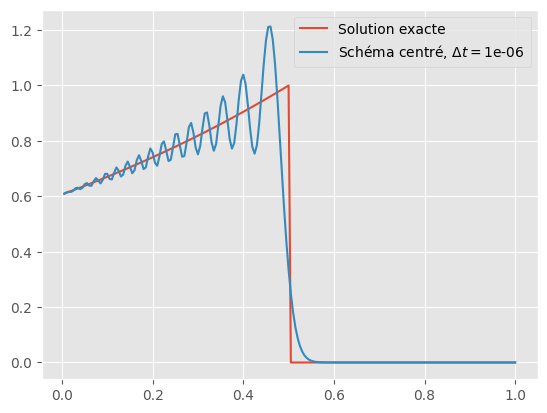

In [7]:
L = 1
nx = 200
dx = L / nx
x = np.linspace(0, L, nx + 1)[1:]

c = 1
t = 0
t_end = 0.5

CFL = 0.0002
dt = CFL * dx / c 
beta = c * dt / dx / 2

u_centred = np.zeros(nx)
A = compute_centered_matrix(nx)

while t < t_end:
    u_centred = update(u_centred, A, compute_G(nx, t), beta)
    t += dt

# Affichage des résultats
plt.plot(x, exact_solution(x, t_end, c), label="Solution exacte")
plt.plot(x, u_centred, label='Schéma centré, $\Delta t=${0:1.0e}'.format(dt))
plt.legend()
plt.show()

#### - *Facteur d'amplification du schéma centré*

$$
    \begin{align*}
        u^{n+1}_i &= u^n_i - \beta\left(u^n_{i+1} - u^n_{i-1}\right) \\
        u^{n+1}_. &= u^n_. - \beta\left(\tau_{-1}u^n_. - \tau_{1} u^n_.\right)
    \end{align*}
$$
Transformée de Fourier discrète
$$
    \hat{u}^{n+1}(\xi) = \hat{u}^n(\xi)\left(1 - \beta\left(\mathrm{e}^{2\mathrm{i}\pi\xi} - \mathrm{e}^{-2\mathrm{i}\pi\xi}\right)\right)
$$
Le facteur d'amplication est donc $\mathrm{A}(\xi) = 1 - \beta\left(2\mathrm{i}\sin(2\pi\xi)\right)$.

Comme $\displaystyle \|\mathrm{A}(\xi)\|^2 = 1 + \beta^2 \sin^2(2\pi\xi) > 1$ si $\xi \in ]0, 1[$, ce schéma est **inconditionnellement instable**.

## 7. Schéma aux différences finies de Lax-Wendroff

Avec $N$ points de discrétisation, nous noterons la solution approchée $u^n_i \simeq u(i\Delta x, n\Delta t)$, où $\Delta x = \frac{L}{N}$.

Pour tout $1 \leqslant i \leqslant N-1$,
$$
    \boxed{\frac{u^{n+1}_i - u^n_i}{\Delta t} + c\,\frac{u^n_{i+1} - u^n_{i-1}}{2\Delta x} - \frac{c^2 \Delta}{2}\,\frac{u^n_{i+1} - 2u^n_i + u^n_{i-1}}{(\Delta x)^2} = 0}
$$
$$
    \Longrightarrow u^{n+1}_i = u^n_i - \frac{c\Delta t}{2\Delta x}\left(u^n_{i+1} - u^n_{i-1}\right) + \frac{c^2(\Delta t)^2}{2(\Delta x)^2}\left(u^n_{i+1} - 2u^n_i + u^n_{i-1}\right)
$$
En posant $\displaystyle\beta = \frac{c\Delta t}{\Delta x}$,
$$
    \begin{align*}
        u^{n+1}_i &= u^n_i - \frac{\beta}{2}\left(u^n_{i+1} - u^n_{i-1}\right) + \frac{\beta^2}{2}\left(u^n_{i+1} - 2u^n_i + u^n_{i-1}\right) \\
                  &= u^n_i - \frac{\beta}{2}\left(u^n_{i+1} - u^n_{i-1} - \beta u^n_{i+1} + 2\beta u^n_i - \beta u^n_{i-1}\right) \\
                  &= u^n_i - \frac{\beta}{2}\left((1 - \beta)u^n_{i+1} + 2\beta u^n_i - (1 + \beta) u^n_{i-1}\right) \\
    \end{align*}
$$
On pose $u^n_{N+1} \simeq u^n_N$ et donc, pour $i = N$,
$$
    \begin{align*}
        u^{n+1}_N &= u^n_N - \frac{\beta}{2}\left((1 - \beta)u^n_N + 2\beta u^n_N - (1 + \beta) u^n_{N-1}\right) \\
                  &= u^n_N - \frac{\beta}{2}(1 + \beta)\left(u^n_N - u^n_{N-1}\right)
    \end{align*}
$$
Soit $U^n = (u^n_i)_{1\leqslant i\leqslant N}$.

En posant $A_{LW} =
    \begin{pmatrix}
        2\beta   &-\beta+1 &0        &\cdots   &0        \\
        -\beta-1 &2\beta   &-\beta+1 &\ddots   &\vdots   \\
        0        &\ddots   &\ddots   &\ddots   &\vdots   \\
        \vdots   &\ddots   &-\beta-1 &2\beta   &-\beta+1 \\
        0        &\cdots   &0        &-\beta-1 &\beta+1
    \end{pmatrix}$ et  $G^n = \begin{pmatrix} \mathrm{e}^{-n\Delta t} \\ 0 \\ \vdots \\ 0 \end{pmatrix}$, on obtient
$$
    \boxed{U^{n+1} = U^n - \frac{\beta}{2} A_{LW}U^n + \frac{\beta}{2}(\beta + 1)G^n}
$$

In [8]:
def compute_A_LW(nx, beta):
    """
    Calcule et retourne la matrice creuse A_LW
    """
    low = -np.ones(nx - 1) * (beta + 1)
    diag = np.ones(nx) * 2 * beta
    diag[-1] = beta + 1
    sup = np.ones(nx - 1) * (1 - beta)

    return diags([low, diag, sup], [-1, 0, 1])


def update_LW(u, A_LW, G, beta):
    """
    Retourne le vecteur u mis à jour en temps  par le schéma de Lax-Wendroff
    """
    return u + beta * ((beta + 1) * G - A_LW @ u) / 2

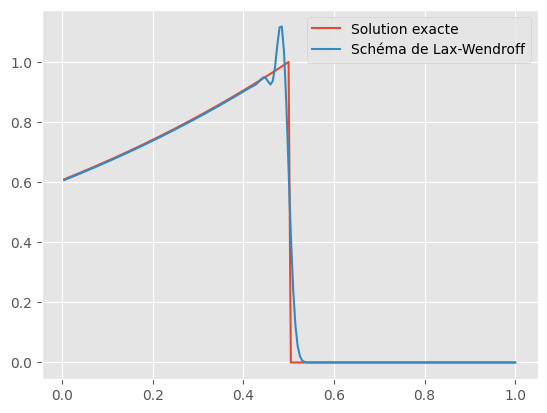

In [9]:
L = 1
nx = 200
dx = L / nx
x = np.linspace(0, L, nx + 1)[1:]

c = 1
t = 0
t_end = 0.5

CFL = 0.9
dt = CFL * dx / c
beta = c * dt / dx

u_LW = np.zeros(nx)
A_LW = compute_A_LW(nx, beta)

while t < t_end:
    G = compute_G(nx, t)
    u_LW = update_LW(u_LW, A_LW, G, beta)
    t += dt

# Affichage des résultats
plt.plot(x, exact_solution(x, t_end, c), label="Solution exacte")
plt.plot(x, u_LW, label="Schéma de Lax-Wendroff")
plt.legend()
plt.show()

#### - _Stabilité du schéma en norme_ $L^2$

##### Méthode de von Neumann

$$
    \begin{align*}
        u^{n+1}_i &= u^n_i - \frac{\beta}{2}\left(u^n_{i+1} - u^n_{i-1}\right) + \frac{\beta^2}{2}\left(u^n_{i+1} - 2u^n_i + u^n_{i-1}\right) \\
        u^{n+1}_. &= u^n_. - \frac{\beta}{2}\left(\tau_{-1}u^n_. - \tau_{1}u^n_.\right) + \frac{\beta^2}{2}\left(\tau_{-1}u^n_. - 2u^n_. + \tau_{1}u^n_.\right) \\
        \Rightarrow \hat{u}^{n+1}(\xi) &= \hat{u}^n(\xi)\left(1 - \frac{\beta}{2}\left(\mathrm{e}^{2\mathrm{i}\pi\xi} - \mathrm{e}^{-2\mathrm{i}\pi\xi}\right) + \frac{\beta^2}{2}\left(\mathrm{e}^{2\mathrm{i}\pi\xi} - 2 + \mathrm{e}^{-2\mathrm{i}\pi\xi}\right)\right)
    \end{align*}
$$
Le facteur d’amplification est donc
$$
    \begin{align*}
        \mathrm{A}(\xi) &= 1 - \frac{\beta}{2}\left(2\mathrm{i}\sin(2\pi\xi)\right) + \frac{\beta^2}{2}\left(2\cos(2\pi\xi) - 2 \right) \\
                        &= \beta^2\cos(2\pi\xi) - \beta\mathrm{i}\sin(2\pi\xi) \\
        |\mathrm{A}(\xi)|^2 &= |\beta^2\cos(2\pi\xi)|^2 + |\beta\sin(2\pi\xi)|^2
    \end{align*}
$$
Si $\beta^2 > 1$, $|\mathrm{A}(\xi)|^2 = |\beta^2\cos(2\pi\xi)|^2 + |\beta\sin(2\pi\xi)|^2 > \cos^2(2\pi\xi) + \sin^2(2\pi\xi) = 1$ et le schéma est instable.

Si $\beta^2 \leqslant 1$, $|\mathrm{A}(\xi)|^2 = |\beta^2\cos(2\pi\xi)|^2 + |\beta\sin(2\pi\xi)|^2 \leqslant \cos^2(2\pi\xi) + \sin^2(2\pi\xi) = 1$ et le schéma est stable.

Nous obtenons donc la condition CFL $\beta^2 \leqslant 1 \Leftrightarrow |c|\Delta t \leqslant \Delta x$.

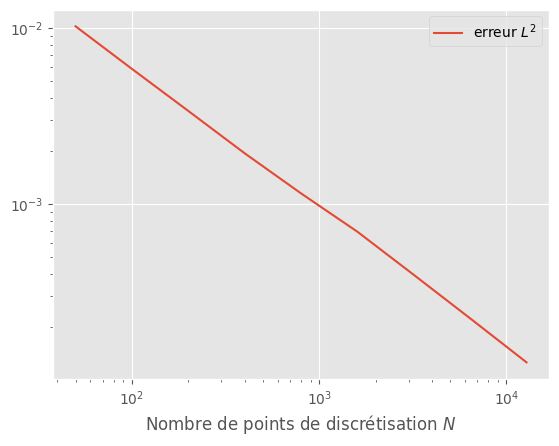

schéma d'ordre 0.79 en erreur $L^2$


In [10]:
L = 1.0
c = 1.0
t_end = 0.5

all_nx = 50 * 2**np.arange(9)
errors_L2 = np.zeros(len(all_nx))

for i_nx, nx in enumerate(all_nx):
    dx = L / nx
    x = np.linspace(0, L, nx + 1)[1:]

    t = 0
    CFL = 0.9
    dt = CFL * dx / c
    beta = c * dt / dx

    u_LW = np.zeros(nx)
    A_LW = compute_A_LW(nx, beta)

    while t < t_end:
        u_LW = update_LW(u_LW, A_LW, compute_G(nx, t), beta)
        t += dt

    u_e = exact_solution(x, t_end, c)
    errors_L2[i_nx] = np.linalg.norm(u_LW - u_e) * dx

plt.loglog(all_nx, errors_L2, label="erreur $L^2$")
plt.xlabel('Nombre de points de discrétisation $N$')
plt.legend()
plt.show()

convergence_order = -np.polyfit(np.log(all_nx), np.log(errors_L2), 1)[0]
print(r"schéma d'ordre {0:4.2f} en erreur $L^2$".format(convergence_order))

On observe que le schéma converge bien en norme $L^2$ si la condition CFL est respectée.

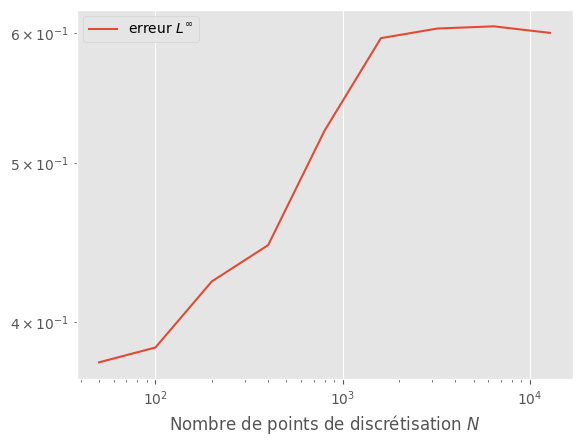

schéma d'ordre -0.10 en erreur $L^\infty$


In [11]:
L = 1.0
c = 1.0
t_end = 0.5

all_nx = 50 * 2**np.arange(9)
errors_L_inf = np.zeros(len(all_nx))

for i_nx, nx in enumerate(all_nx):
    dx = L / nx
    x = np.linspace(0, L, nx + 1)[1:]

    t = 0
    CFL = 0.9
    dt = CFL * dx / c
    beta = c * dt / dx

    u_LW = np.zeros(nx)
    A_LW = compute_A_LW(nx, beta)

    while t < t_end:
        u_LW = update_LW(u_LW, A_LW, compute_G(nx, t), beta)
        t += dt

        u_e = exact_solution(x, t_end, c)
        errors_L_inf[i_nx] = np.linalg.norm(u_LW - u_e, np.inf)

plt.loglog(all_nx, errors_L_inf, label="erreur $L^\infty$") 
plt.xlabel('Nombre de points de discrétisation $N$')
plt.legend()
plt.show()

convergence_order = -np.polyfit(np.log(all_nx), np.log(errors_L_inf), 1)[0]
print(r"schéma d'ordre {0:4.2f} en erreur $L^\infty$".format(convergence_order))

On peut observer que le schéma n'est pas stable dans $L^\infty$.